#**BREAST CANCER ANALYSIS**

# **Problem Statement**

**Getting started with library loading and setting options**

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
#loading the libraries
import numpy as np
import pandas as pd # data processingused for CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Loading the dataset**

First, using the Pandas read csv function's additional options to load the provided CSV file.

Examining the statistics
Visually inspecting the new data collection comes first. There are several methods to accomplish this:

The simplest is to use the DataFrame data.head() method to obtain the first few records. The DataFrame object df's data.head() function typically gives the first 5 rows (excluding the header row).
The five elements of the data frame can also be returned using df.tail() as an alternative.
You can indicate the number of records for the head and tail methods by including the necessary number between the parentheses when calling either method.
examining the time statistics.

In [62]:
# Read the file "breastCancer.csv" and printing its contents.
bCancer_df = pd.read_csv("breastCancer.csv")

In [63]:
# Since id column is redundant and not very useful, so I want to drop it
bCancer_df.drop('id',axis=1, inplace=True)

In [64]:
bCancer_df.iloc[1]

diagnosis                         M
radius_mean                   20.57
texture_mean                  17.77
perimeter_mean                132.9
area_mean                    1326.0
smoothness_mean             0.08474
compactness_mean            0.07864
concavity_mean               0.0869
concave points_mean         0.07017
symmetry_mean                0.1812
fractal_dimension_mean      0.05667
radius_se                    0.5435
texture_se                   0.7339
perimeter_se                  3.398
area_se                       74.08
smoothness_se              0.005225
compactness_se              0.01308
concavity_se                 0.0186
concave points_se            0.0134
symmetry_se                 0.01389
fractal_dimension_se       0.003532
radius_worst                  24.99
texture_worst                 23.41
perimeter_worst               158.8
area_worst                   1956.0
smoothness_worst             0.1238
compactness_worst            0.1866
concavity_worst             

In [65]:
bCancer_df.shape

(569, 31)

As you can see from the displayed outcome, there are 569 records in total, each with 32 columns.

The info() function gives a brief summary of the data; from the output, it shows what kind of data is in each column, how many non-null values are present in each column, and how much memory the data frame is consuming.

The number of each category of column in a DataFrame is returned by the method get dtype counts():

In [66]:
# Reviewing the data types with the "info()".
bCancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [67]:
# Checking for any missing values
bCancer_df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [68]:
bCancer_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

According to the findings above, diagnosis is a categorical variable because it only has two potential values: malignant and benign. We need to use some kind of coding to convert them because machine learning systems prefer to receive inputs that are numbers rather than strings.

**NOTE**: The next stage entails looking more closely at attributes and data values now that we have a solid intuitive understanding of the data. We will delve deeper into the material in Part 2.

# **Exploratory Data Analysis**

**Descriptive Statistics**

Statistics used to summarise data are called summary statistics. There are numerous summary metrics in descriptive statistics.

In [69]:
#basic descriptive statistics
bCancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
bCancer_df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Positive (right) or negative (left) skews are displayed in the skew outcome. Values that are nearer to zero have less variance.

In [71]:
bCancer_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [72]:
# Grouping by the column diagnosis and reviewing the output.
Cancer_gr = bCancer_df.groupby('diagnosis', axis=0)
pd.DataFrame(Cancer_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


**Observation**

> 357 observations shows the presence of cancer cells while 212 show absence of cancer cell






**Unimodal Data Visualisation**

Identifying the characteristics that are most useful in predicting either malignant or benign cancer is one of the primary objectives of visualising the data in this case. The other is to look for broad patterns that can help us choose models and hyperparameters.

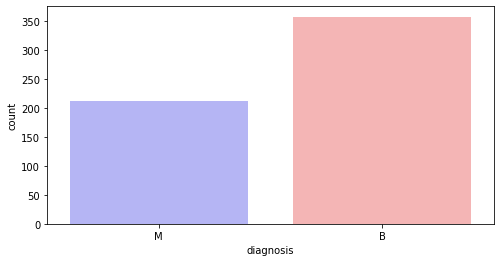

In [73]:
#Checking the frequency of cancer diagnosis
sns.countplot(x="diagnosis", data=bCancer_df, palette="bwr")
plt.show()

In [74]:
countMalignant = len(bCancer_df[bCancer_df.diagnosis == 'M'])
countBenign = len(bCancer_df[bCancer_df.diagnosis == 'B'])
print("Percentage of People having Malignant Breast Cancer: {:.2f}%".format((countMalignant / (len(bCancer_df.diagnosis))*100)))
print("Percentage of People having Malignant Breast Cancer: {:.2f}%".format((countBenign / (len(bCancer_df.diagnosis))*100)))

Percentage of People having Malignant Breast Cancer: 37.26%
Percentage of People having Malignant Breast Cancer: 62.74%


**Visualizing data distribution through histograms**

Separating the columns into smaller df to perform visualisation

In [75]:
bdf_mean=bCancer_df.iloc[:,1:11]
bdf_se=bCancer_df.iloc[:,11:21]
bdf_worst=bCancer_df.iloc[:,21:]

**Histogram for the _mean suffixed column**

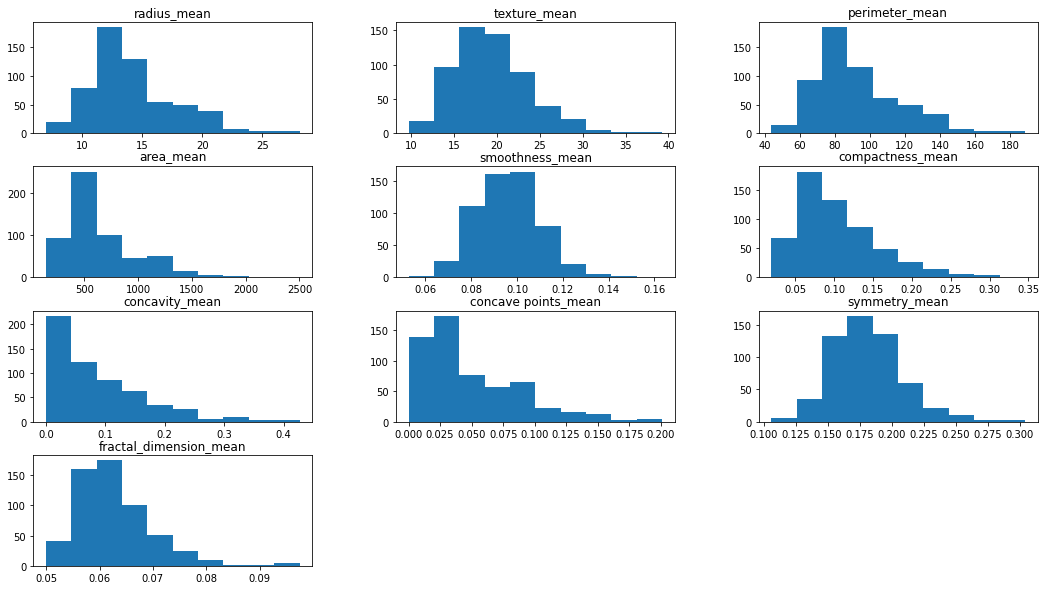

In [76]:
#Plotting the histograms of _mean variables
hist_mean=bdf_mean.hist(bins=10, figsize=(18, 10),grid=False,)


**Histogram for the _se suffixed column**

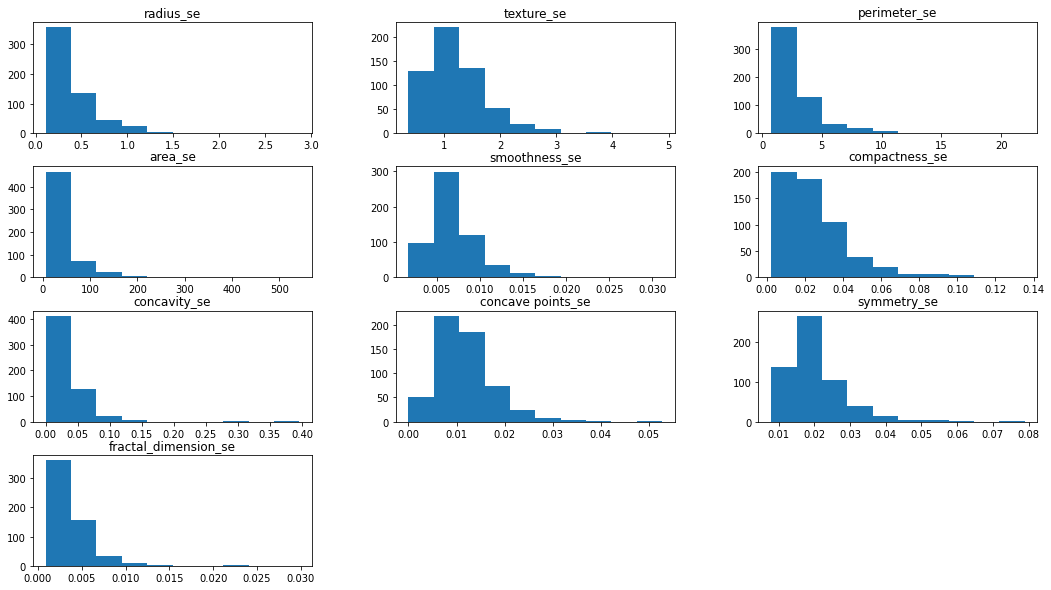

In [77]:
#Plotting the histograms of _se variables
hist_se=bdf_se.hist(bins=10, figsize=(18, 10),grid=False,)

**Histogram for the _worst suffixed column**

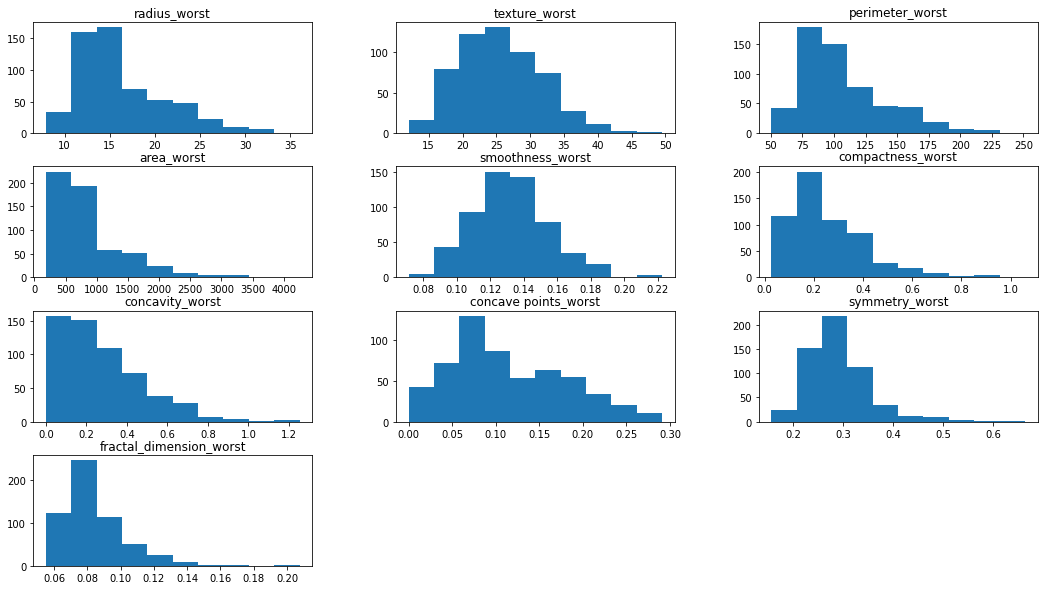

In [78]:
#Plotting the histograms of _worst variables
hist_worst=bdf_worst.hist(bins=10, figsize=(18, 10),grid=False,)

**Observation**

> We can see that the concavity and concavity point characteristics might have an exponential distribution ( ). Additionally, we can see that the smoothness, texture, and symmetric properties may have a Gaussian or nearly Gaussian distribution. This is intriguing because many machine learning methods rely on input variables having a Gaussian univariate distribution.



**Mutimodal Data Visualisation**



*   Scatter plot
*   Correlation matrix



<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

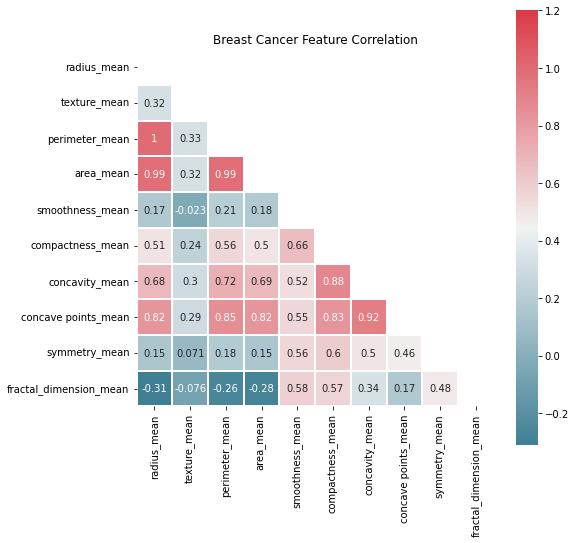

In [79]:
# plotting the correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
bCancer_df.drop('id',axis=1, inplace=True)

# Compute the correlation matrix
bCancer_corr = bdf_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(bCancer_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
bCancer_df, bC_ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bCancer_corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=bC_ax,annot=True, fmt='.2g',linewidths=2)

**Observation**

> There is a significant positive correlation between mean values and parameters between 1 and 0.75.
* A few parameters have moderately positive 
correlations (r between 0.5 and 0.75), such as concavity and area, concavity and perimeter, etc. 
* The mean area of the tissue nucleus has a strong positive association with the mean values of radius and parameter.
* Similar to this, we observe a strong negative association between fractal dimension and the mean values of the radius, texture, and parameter.






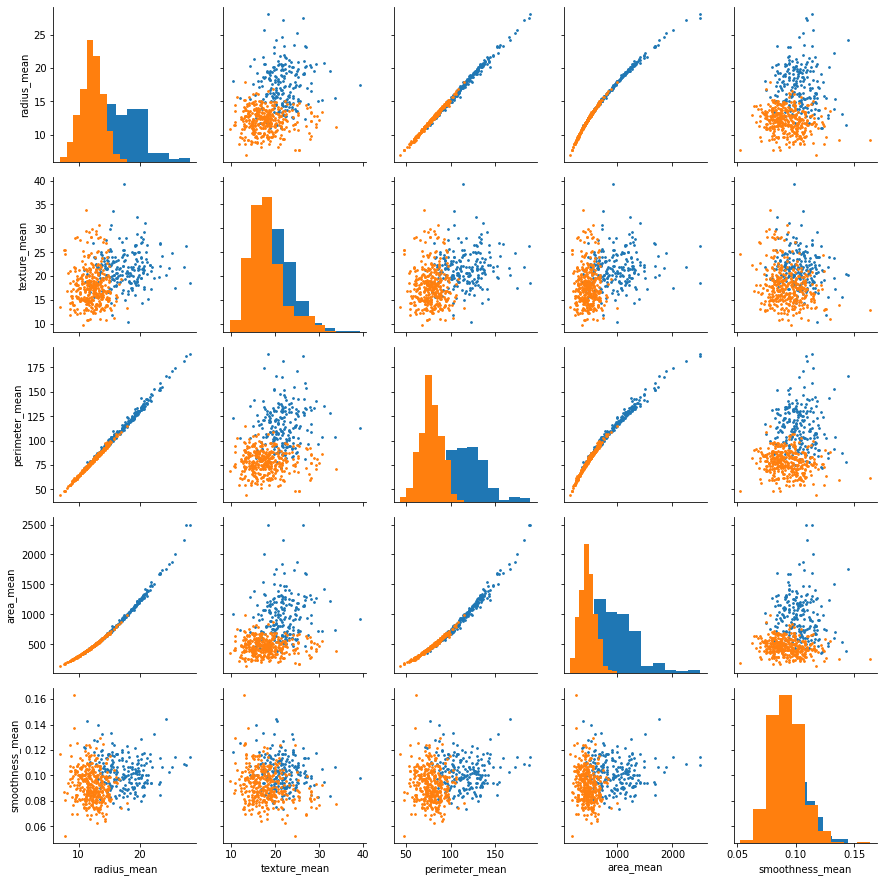

In [80]:

bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
Cancer_g = sns.PairGrid(bCancer_df[[bCancer_df.columns[1],bCancer_df.columns[2], bCancer_df.columns[3],
                     bCancer_df.columns[4], bCancer_df.columns[5], bCancer_df.columns[6]]], hue='diagnosis')
Cancer_g = Cancer_g.map_diag(plt.hist)
Cancer_g = Cancer_g.map_offdiag(plt.scatter, s = 3)


**Summary**

> 

*   Cancer can be categorised using the average values of the cell's radius, circumference, area, compactness, concavity, and concave points. These parameters' larger levels frequently exhibit a correlation with malignant tumours.

* There is no clear predilection for one diagnosis over another in the mean values of texture, smoothness, symmetry, or fractual dimension.

* There are no observable big outliers that call for additional cleanup in any of the histograms.







# **Data Pre-processing**

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the libraries for data processing
import pandas as pd #data processing for CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# Used for visualization
import seaborn as sns 

plt.rcParams['figure.figsize'] = (8,4) 

bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
bCancer_df.drop('id',axis=1, inplace=True)
bCancer_df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**Label encoding**

The 30 features are now assigned to a NumPy array X, and the class labels are converted from their initial string representation (M and B) into integers.

In [82]:
#Assigning predictors to a value of ndarray (matrix) type
array = bCancer_df.values
X = array[:,1:31]
y = array[:,0]
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [83]:
#transforming the class labels from the string representation of M and B into int values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,



> The malignant tumours are now represented as class 1 (i.e. presence of cancer cells) and the benign tumours are represented as class 0 (i.e. no cancer cells detection), respectively, after encoding the class labels(diagnosis) in an array y. This is demonstrated by calling the transform method of LabelEncorder on two dummy variables.



**Model Accuracy assessment: Splitting Data**


> Here, I'll

*   Create a training set and a testing set from the data that is accessible. (30% exam, 70% training)
*   The first portion is used to train the algorithm, the second part is used to make predictions, and the predictions are then tested against the anticipated outcomes.







In [84]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((426, 30), (426,), (143, 30), (143,))

**Feature Standarization**

With a standardised version of the dataset, let's assess the same methods. In this case, I scale and transform the data using sklearn so that each characteristic has a mean value of 0 and a standard deviation of 1.

In [85]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
bCancer_scaler =StandardScaler()
bc_Xs = bCancer_scaler.fit_transform(X)

**Feature decomposition using PCA**

Many feature pairs divide the data in a similar way, as seen in the pair plot in EDA part, so it makes sense to employ one of the dimensionality reduction techniques in order to maintain as much information as possible while dealing with only two dimensions. I'll apply PCA.

In [86]:
from sklearn.decomposition import PCA
# feature extraction
bc_pca = PCA(n_components=10)
bc_fit = bc_pca.fit(bc_Xs)


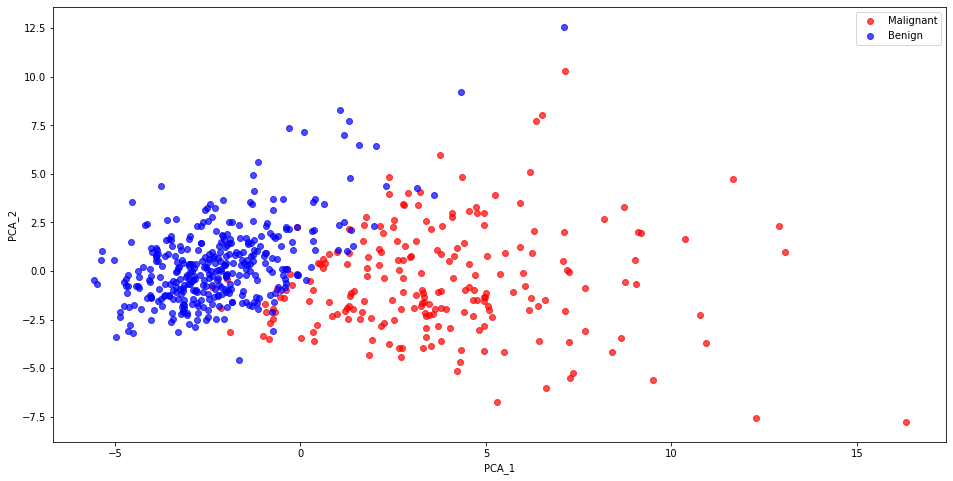

In [87]:
bc_X_pca = bc_pca.transform(bc_Xs)

bc_PCA_df = pd.DataFrame()

bc_PCA_df['PCA_1'] = bc_X_pca[:,0]
bc_PCA_df['PCA_2'] = bc_X_pca[:,1]
plt.figure(figsize=(16,8))
plt.plot(bc_PCA_df['PCA_1'][bCancer_df.diagnosis == 'M'],bc_PCA_df['PCA_2'][bCancer_df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(bc_PCA_df['PCA_1'][bCancer_df.diagnosis == 'B'],bc_PCA_df['PCA_2'][bCancer_df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

We now have a lower dimensional subspace (from 3D to 2D in this instance) where the samples are most evenly distributed along the new feature axes as a result of applying the linear PCA transformation.

In [88]:
#Each PC's explanation of the degree of variation
var= bc_pca.explained_variance_ratio_


**Deciding the number of priciples to retain**

It is typical to create a scree plot to summarise the findings of a principal components analysis before deciding how many principal components should be kept.

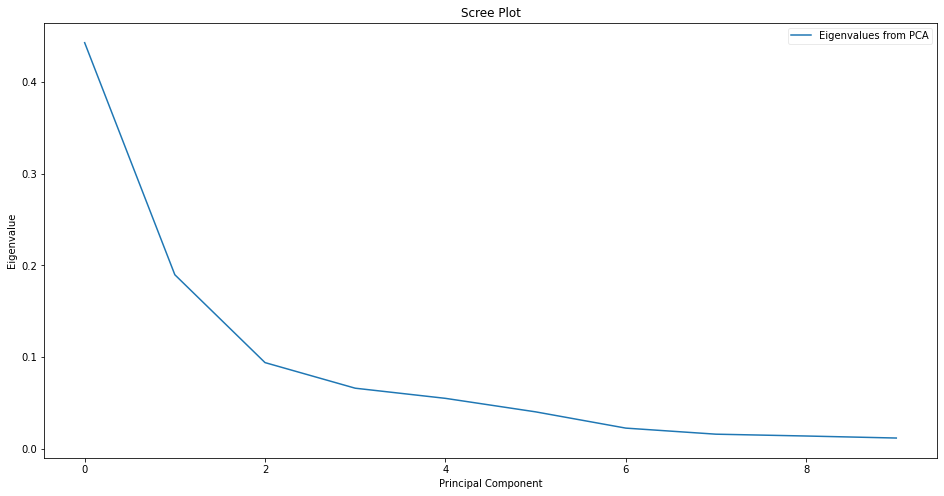

In [89]:
#The amount of variance that each PC explains
bc_var= bc_pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)
plt.figure(figsize=(16,8))
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

**Observation**

> Component 2, the "elbow" of the scree plot, is where the scree plot's incline changes the most obviously. The first three components should therefore be kept, it could be argued on the premise of the scree plot.



# **Predictive model using SVM**

In kernel SVMs, the crucial factors are the

* Regularization term C,
* The selection of the kernel's characteristics, which can be linear, radial, or polynomial.

Gamma and C both influence the model's complexity; higher values of either parameter make the model more complicated. C and gamma should be adjusted together because appropriate settings for the two parameters are typically strongly correlated.

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

#Loading libraries for data processing
import pandas as pd #data processing for CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# used for visualization
import seaborn as sns 

plt.rcParams['figure.figsize'] = (8,4) 



In [91]:
bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
bCancer_df.drop('id',axis=1, inplace=True)
bCancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
#Assigning predictors
array = bCancer_df.values
X = array[:,1:31] # features
y = array[:,0]

#transforming the class labels 
le = LabelEncoder()
y = le.fit_transform(y)

# Normalizing the  data
bCancer_scaler = StandardScaler()
bc_Xs = bCancer_scaler.fit_transform(X)

**Classification with cross-validation**



In [93]:
# Dividing the records in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(bc_Xs, y, test_size=0.3, random_state=2, stratify=y)

# Creating an SVM classifier and training it on 70% of the dataset.
bc_svc = SVC(probability=True)
bc_svc.fit(X_train, y_train)

# Analyzing the accuracy of the predictions on 30% of the holdout test sample.
svc_classifier_score = bc_svc.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(svc_classifier_score))



➔ The classifier accuracy score is 0.95



In [94]:
# Getting the average of a 3-fold cross-validation score using SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), bc_Xs, y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



The assessments mentioned above were conducted while utilising all available features. To evaluate the impact of using three features that have the best correlation with the class labels, you will now use the correlation-based feature selection approach.

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression
bc_clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

svc_scores = cross_val_score(bc_clf2, bc_Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), bc_Xs, y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [96]:
print (svc_scores)
avg = (100*np.mean(svc_scores), 100*np.std(svc_scores)/np.sqrt(svc_scores.shape[0]))
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
➔ Average score and uncertainty: (94.20 +- 0.496)%


**Receiving Operating Characteristics Curve(ROC)**

Area Under the Curve is a frequently used performance indicator of model accuracy for binary classification issues in statistical modelling and machine learning (AUC).

In [97]:
# The confusion matrix will help in visualizing the performance of algorithm.
bc_pred = bc_svc.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, bc_pred)


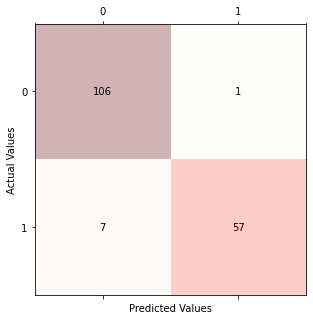

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, bc_pred ))

**Observation**


> "1" and "0" are the two potential predicted classes. Malignant = 1 (indicates prescence of cancer cells) and Normal = 0 (indicates abscence).

> The classifier generated 174 forecasts in total (i.e 174 patients were being tested for the presence breast cancer).
Out of those 174 instances, the classifier predicted "yes" 58 times, and "no" 113 times.
In actuality, 107 patients in the sample do not have the illness, while 64 do.



Text(0.5, 1.0, 'ROC')

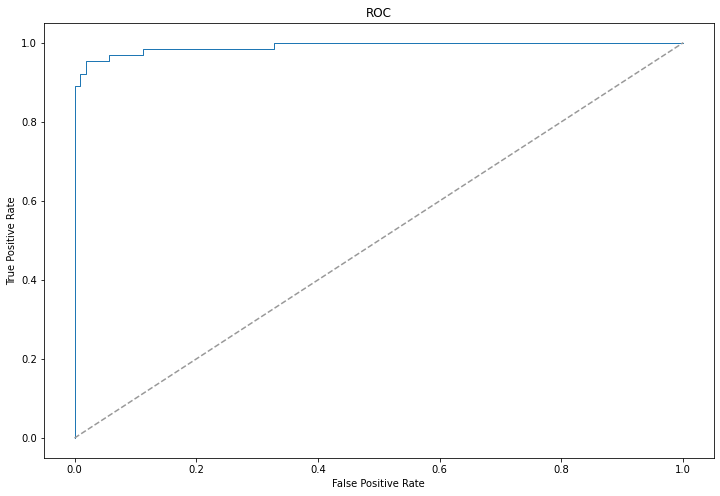

In [99]:
from sklearn.metrics import roc_curve, auc

# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(12,8))
probas_ = bc_svc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')


**Optimizing the SVM Classifier**

In order to be tailored for a specific issue, machine learning models are parameterized. Models may contain a wide range of parameters, making it possible to formulate the best combination of parameters as a search issue. In this section, we'll use scikit-learn to fine-tune the SVM Classification model's settings.

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the libraries for data processing
import pandas as pd #data processing for CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# Used for visualization
import seaborn as sns 

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

**Building a predictive model and evaluating with 5-cross validation using support vector classifies**

In [101]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)


The classifier accuracy score is 0.96

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



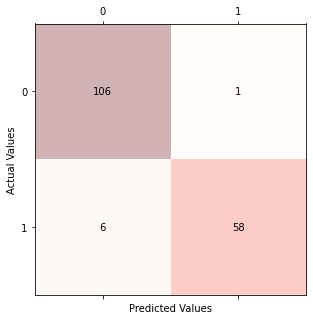

In [102]:
bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
bCancer_df.drop('id',axis=1, inplace=True)

# Assign predictors to a variable of ndarray (matrix) type
array = bCancer_df.values
X = array[:,1:31]
y = array[:,0]

# Transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
bc_scaler =StandardScaler()
Xs = bc_scaler.fit_transform(X)

from sklearn.decomposition import PCA
# feature extraction
bc_pca = PCA(n_components=10)
bc_fit = bc_pca.fit(Xs)
bc_X_pca = bc_pca.transform(Xs)

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(bc_X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(bc_clf2, bc_X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), bc_X_pca, y, cv=n_folds))
#print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [103]:
# Training classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

bc_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
bc_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [104]:
print("The best parameters are %s with a score of %0.2f"
      % (bc_grid.best_params_, bc_grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [105]:
bc_grid.best_estimator_.probability = True
bc_clf = bc_grid.best_estimator_

SVM Score is 97.08%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



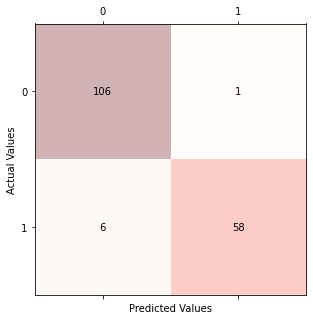

In [106]:
accuracies = {}
y_pred = bc_clf.fit(X_train, y_train).predict(X_test)
bc_svm_acc = bc_clf.score(X_test,y_test)*100
accuracies['SVM'] = bc_svm_acc
print("SVM Score is {:.2f}%".format(bc_svm_acc))
bc_svm_cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

**Decision boundaries for different classifiers**

Let's see the decision boundaries produced by the linear, Gaussian and polynomial classifiers.

In [107]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Creating color maps
#================================================================
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# I am creating an instance of SVM and fit the data. 
# I am not scaling my data since I want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [108]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
# creating a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

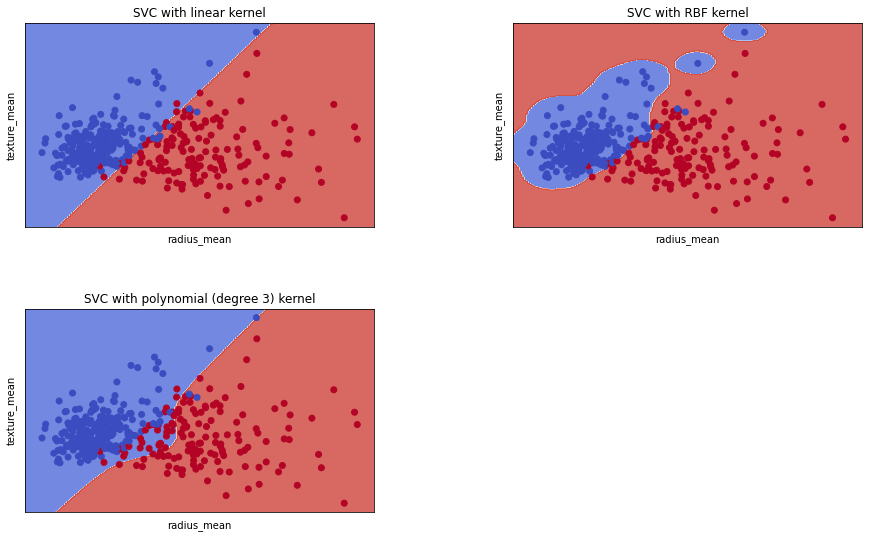

In [109]:
for i, bc_clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plotting the decision boundary. For that, I assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    bc_Z = bc_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    bc_Z = bc_Z.reshape(xx.shape)
    plt.contourf(xx, yy, bc_Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**Summary**

In this study, Support Vector Machines are used to model breast cancer as a classification job.

When all attributes in the dataset have a mean value of zero and a standard deviation of one, the SVM works better. This can be calculated from the complete training dataset, and the input attributes from the validation dataset can be transformed using the same method.

**Next**

1. Summary and conclusion of findings
2. Compare with other classification methods
  * Decision trees with tree.DecisionTreeClassifier()
  *K-nearest neighbors with neighbors.KNeighborsClassifier()

# **Automating the ML process using pipelines**

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

# Creating a pipeline that will standardize the data then create a model
#Loading libraries for data processing
import pandas as pd #data processing for CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Used for visualization
import seaborn as sns 

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'


**Evaluating Some Algorithms**

Reviewing a Few Algortihms
It's time to start building some data models and estimating how accurate they will be with future data. Here is what we are going to discuss in this step:

* Make a validation sample distinct.
* Configure the test framework to use 10-fold cross validation.
* Create 3 different models.
* Select the most effective strategy

In [111]:
#load data
bCancer_df = pd.read_csv('breastCancer.csv', index_col=False)
bCancer_df.drop('id',axis=1, inplace=True)

# Split-out validation dataset
array = bCancer_df.values
X = array[:,1:31]
y = array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

In [112]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
bc_num_folds = 10
bc_num_instances = len(X_train)
bc_seed = 7 
bc_scoring = 'accuracy'

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=bc_num_folds, random_state=bc_seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=bc_scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\n➔ 10-Fold cross-validation accurcay score for the training data for four classifiers') 

LR: 0.942244 (0.025053)
KNN: 0.937179 (0.028218)
DTREE: 0.929679 (0.031181)
SVM: 0.901987 (0.047020)

➔ 10-Fold cross-validation accurcay score for the training data for four classifiers


In [113]:
len(X_train)

398

**Observation**

The findings imply that KNN may merit further investigation. These accuracy numbers are merely averages. Examining the distribution of accuracy values computed across cross validation folds is always a good idea. Box and whisker plots allow us to represent that visually.

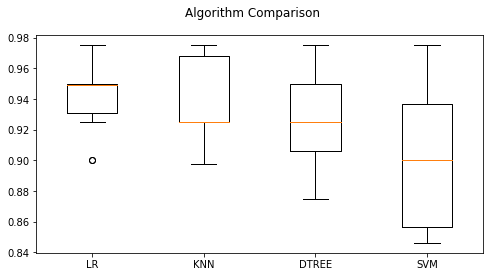

In [114]:
# Comparing Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation**

> Except for SVM, all classifiers' results exhibit a similar tight distribution, which is encouraging as it indicates minimal variance. SVM's positive outcomes are acceptable.

> It's conceivable that the diverse distribution of the attributes will affect how accurate algorithms like SVM are. We will conduct another spot-check using a standard version of the training dataset in the part that follows.

In [115]:
# Standardizing the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDTREE', Pipeline([('Scaler', StandardScaler()),('DTREE', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:  
    kfold = KFold(n_splits=bc_num_folds, random_state=bc_seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=bc_scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.974936 (0.015813)
ScaledKNN: 0.957372 (0.033665)
ScaledDTREE: 0.942308 (0.031628)
ScaledSVM: 0.967436 (0.027483)


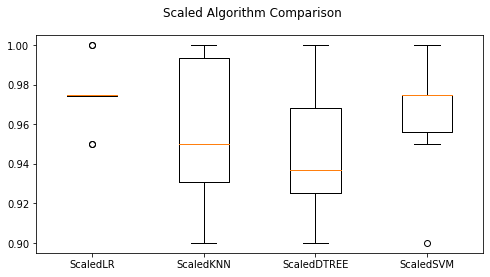

In [116]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation**

>The results show that data standardisation enhanced the performance of SVM, making it the most accurate technique to date.

> The findings suggest further research into the SVM, and KNN algorithms. It is very likely that altering the preset settings will result in models that are even more accurate.

**Algorithm Tuning**

In this part, we look into fine-tuning the parameters for two algorithms: KNN, and SVM. These algorithms showed promise in the spot-checking in the previous section.

**Tuning hyper-parameters - SVC estimator**

In [117]:
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('➝ Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➔ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9446794871794871
➔ Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


**Tuning the hyper-parameters: KNN hyperparameters**


There are two main hyperparameters for your typical k-NN implementation that you should tune:

* the quantity k of neighbours.
* the measure of separation or similarity.

Both of these parameters have a significant impact on how accurate your k-NN algorithm is. A KNN model using a 10-fold cross validation with classification accuracy as the evaluating measure is ready to be used by the grid object. Additionally, a parameter matrix is present to perform 30 repetitions of the 10-fold cross validation procedure. The n neighbors parameter should always receive a unique number from the list. GridSearchCV can't just receive a manifest from us. The n neighbors parameter should be set to 1 through 30. You can perform calculations in parallel by setting n jobs = -1. (if supported by your computer and OS)

In [118]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier(n_neighbors=3))])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('➝ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
gs = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)


➝ Model Training Accuracy: 0.915 +/- 0.047
➔ Tuned Parameters Best Score:  0.9396153846153847
➔ Best Parameters: 
 {'clf__n_neighbors': 19}


In [119]:
y_head_knn = pipe_knn.predict(X_test)


KNN Score is 96.49%
              precision    recall  f1-score   support

           B       0.98      0.97      0.97       116
           M       0.93      0.96      0.95        55

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



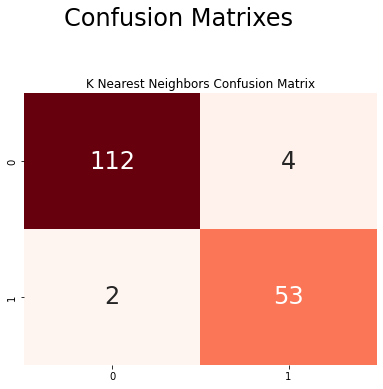

In [120]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_head_knn)
acc = accuracy_score(y_test, y_head_knn)*100
accuracies['KNN'] = acc
print("KNN Score is {:.2f}%".format(acc))
print(classification_report(y_test, y_head_knn))
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap=plt.cm.Reds,fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [121]:

clf_svc = gs.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

➔ Final Model Training Accuracy: 0.940 +/- 0.034
➜ Final Accuracy on Test set: 0.94737


SVM Score is 94.74%
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       116
           M       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



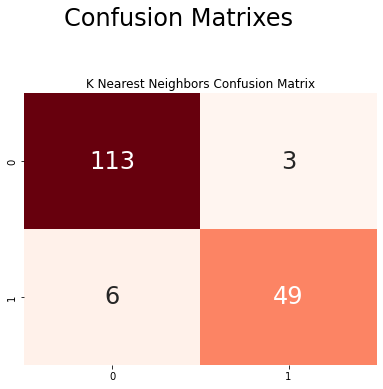

In [122]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
accuracies['SVM'] = acc
print("SVM Score is {:.2f}%".format(acc))
svc_cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(svc_cm,annot=True,cmap=plt.cm.Reds,fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**Conclusion**

I used Python to complete a classification predictive modelling issue. The stages covered in detail were:

* Issue Specification (Breast Cancer data).
* the dataset being loaded.
* Analyze data with different distributions but the same size.
  * Review algorithms (KNN looked good).
  * Examine algorithms using standardised criteria (KNN and SVM looked good).
* Algorithm Tuning (K=19 for KNN was fine, SVM with an RBF kernel and C=100 was best)..
* Finish the model (use all training data and confirm using validation dataset)